In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Processing the English Training Dataset

In [2]:
df = pd.read_csv("RawEnglishDataset.csv")
df.drop(columns=["Headline","Authors","Date","URL","Brand"],inplace=True)
df.loc[df["Label"]=="Credible",["Label"]] = 1
df.loc[df["Label"]=="Not Credible",["Label"]] = 0
df.rename(columns={"Label":"label","Content":"article"},inplace=True)
df

,article,label
0,Pollution caused by traditional cooking fuel i...,1
1,Justice Secretary Vitaliano Aguirre 2nd and Ph...,1
2,President Rodrigo Duterte on Monday night desc...,1
3,THE militant fisher folk group Pambansang Laka...,1
4,Magdalo Rep. Gary Alejano is willing to lead t...,1
...,...,...
22453,"Indeed, everybody is shocked — just shocked! —...",0
22454,"A TOTAL of 132,259 individuals from 28,101 fam...",1
22455,Shortly after Rod Duterte announced there will...,0
22456,President Barack Obama met for the first time ...,0


##### Checking for Null data points

In [3]:
df.isnull().sum()

article    0
label      0
dtype: int64

### Extracting English data for testing

In [4]:
df.shape
df = df.sample(frac = 1)
testing_df = df.tail(378)
for i in range(22457,22079,-1):
    df.drop([i], axis = 0, inplace = True)

testing_df.to_csv("EnglishTestDataset.csv", index=False)
df.to_csv("EnglishProcessedDataset.csv", index=False)

In [5]:
df = pd.read_csv("EnglishProcessedDataset.csv")

### Function for cleaning up the text

In [6]:
def cleantext(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

df["article"] = df["article"].apply(cleantext)

### Defining Variables

In [7]:
x = df["article"]
y = df["label"]
y=y.astype('int')

### Split to Training and Testing Sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Vectorizing text

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.947463768115942

In [11]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1888
           1       0.95      0.98      0.96      3632

    accuracy                           0.95      5520
   macro avg       0.95      0.93      0.94      5520
weighted avg       0.95      0.95      0.95      5520



### Decision Tree Classification

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.8675724637681159

In [13]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1888
           1       0.90      0.90      0.90      3632

    accuracy                           0.87      5520
   macro avg       0.85      0.85      0.85      5520
weighted avg       0.87      0.87      0.87      5520



### Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.9210144927536232

In [15]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1888
           1       0.92      0.96      0.94      3632

    accuracy                           0.92      5520
   macro avg       0.92      0.90      0.91      5520
weighted avg       0.92      0.92      0.92      5520



### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9228260869565217

In [17]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1888
           1       0.92      0.97      0.94      3632

    accuracy                           0.92      5520
   macro avg       0.93      0.90      0.91      5520
weighted avg       0.92      0.92      0.92      5520



### Testing the Models

In [18]:
def LR_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    return pred_LR[0]

def DT_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
    return pred_DT[0]

def GBC_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_GBC = GBC.predict(new_xv_test)
    return pred_GBC[0]
    
def RFC_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_RFC = RFC.predict(new_xv_test)
    return pred_RFC[0]
    
def classify_result(correct,prediction):
    if correct == 1 and prediction == 1:
        return "True Positive"
    elif correct == 1 and prediction == 0:
        return "False Negative"
    elif correct == 0 and prediction == 0:
        return "True Negative"
    elif correct == 0 and prediction == 1:
        return "False Positive"

### Graphing Accuracy of Models

In [19]:
analysis_df = df = pd.read_csv("EnglishTestDataset.csv")

analysis_df.loc[:,["LR"]] = analysis_df["article"].apply(LR_test)
analysis_df.loc[:,["LR"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["LR"])

analysis_df.loc[:,["DT"]] = analysis_df["article"].apply(DT_test)
analysis_df.loc[:,["DT"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["DT"])

analysis_df.loc[:,["GBC"]] = analysis_df["article"].apply(GBC_test)
analysis_df.loc[:,["GBC"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["GBC"])

analysis_df.loc[:,["RFC"]] = analysis_df["article"].apply(RFC_test)
analysis_df.loc[:,["RFC"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["RFC"])

In [20]:
LR_analysis_df = analysis_df.groupby("LR")["LR"].count().to_frame()
LR_analysis_df.rename(columns={"LR":"count"},inplace=True)
LR_analysis_df.reset_index(inplace=True)
LR_analysis_x = np.array(LR_analysis_df["LR"])
LR_analysis_y = np.array(LR_analysis_df["count"])

DT_analysis_df = analysis_df.groupby("DT")["DT"].count().to_frame()
DT_analysis_df.rename(columns={"DT":"count"},inplace=True)
DT_analysis_df.reset_index(inplace=True)
DT_analysis_x = np.array(DT_analysis_df["DT"])
DT_analysis_y = np.array(DT_analysis_df["count"])

GBC_analysis_df = analysis_df.groupby("GBC")["GBC"].count().to_frame()
GBC_analysis_df.rename(columns={"GBC":"count"},inplace=True)
GBC_analysis_df.reset_index(inplace=True)
GBC_analysis_x = np.array(GBC_analysis_df["GBC"])
GBC_analysis_y = np.array(GBC_analysis_df["count"])

RFC_analysis_df = analysis_df.groupby("RFC")["RFC"].count().to_frame()
RFC_analysis_df.rename(columns={"RFC":"count"},inplace=True)
RFC_analysis_df.reset_index(inplace=True)
RFC_analysis_x = np.array(RFC_analysis_df["RFC"])
RFC_analysis_y = np.array(RFC_analysis_df["count"])


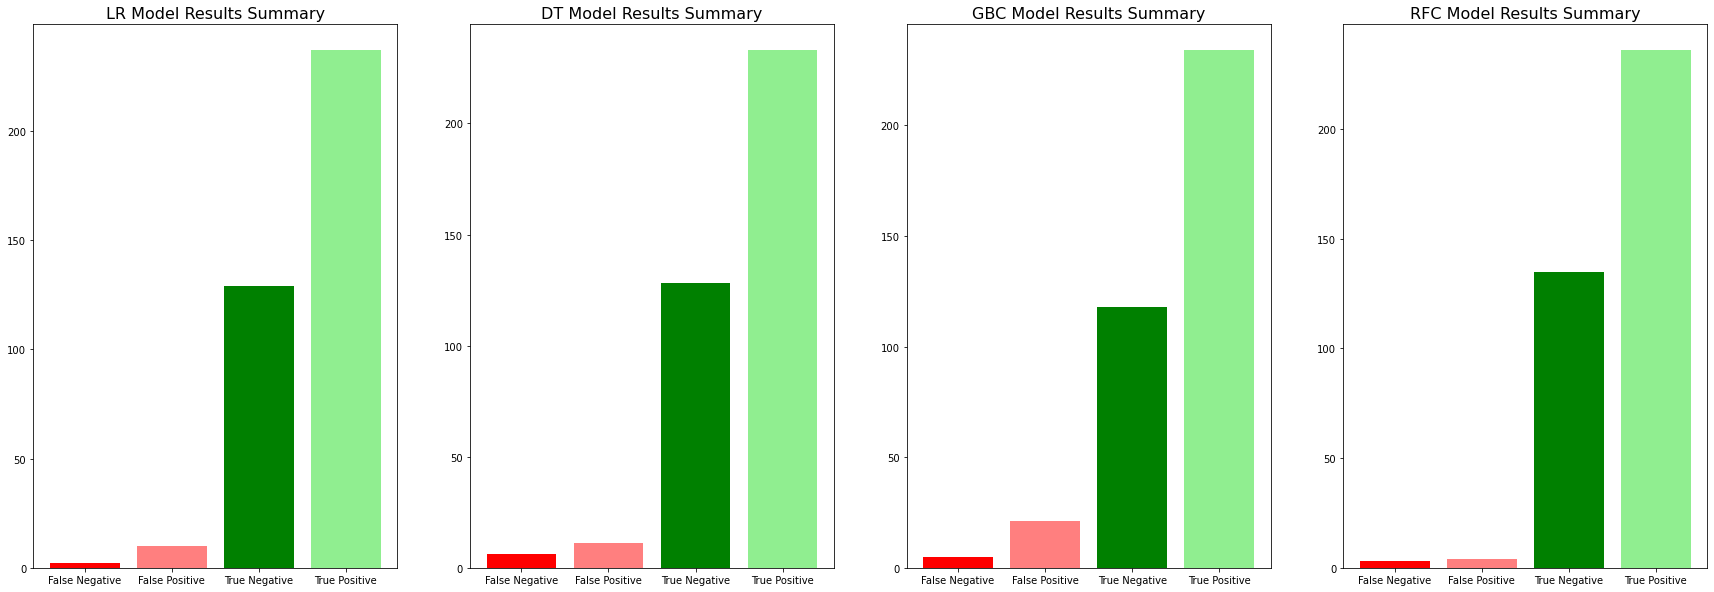

<Figure size 792x432 with 0 Axes>

In [21]:
def set_color(result):
    if result == "False Negative":
        return "red"
    elif result == "False Positive":
        return "#FF7F7F"
    elif result == "True Negative":
        return "green"
    elif result == "True Positive":
        return "#90EE90"

fig,ax = plt.subplots(1,4)
plt.figure(figsize = (11,6))
fig.set_size_inches(30,10)

ax[0].bar(height= LR_analysis_y,x=LR_analysis_x,color= [set_color(i) for i in LR_analysis_x])
ax[0].set_title("LR Model Results Summary",fontsize=16)
ax[1].bar(height = DT_analysis_y,x=DT_analysis_x,color= [set_color(i) for i in DT_analysis_x])
ax[1].set_title("DT Model Results Summary",fontsize=16)
ax[2].bar(height= GBC_analysis_y,x=GBC_analysis_x,color= [set_color(i) for i in GBC_analysis_x])
ax[2].set_title("GBC Model Results Summary",fontsize=16)
ax[3].bar(height = RFC_analysis_y,x=RFC_analysis_x,color= [set_color(i) for i in RFC_analysis_x])
ax[3].set_title("RFC Model Results Summary",fontsize=16)
fig.savefig("EnglishBarGraph.png")

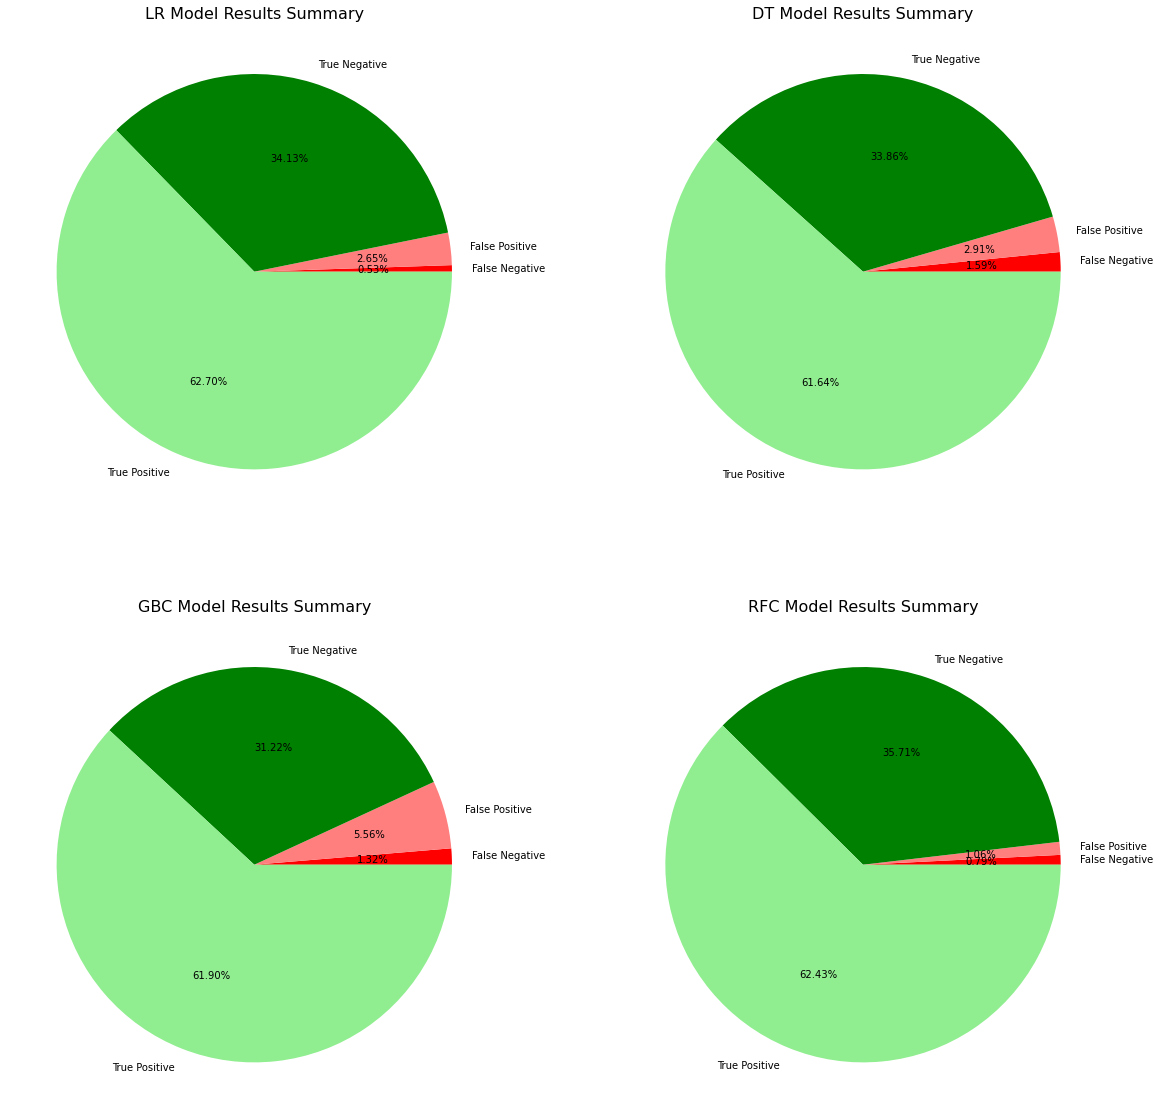

<Figure size 432x432 with 0 Axes>

In [22]:
fig,ax = plt.subplots(2,2)
plt.figure(figsize = (6,6))
fig.set_size_inches(20,20)

ax[0,0].pie(LR_analysis_y,labels=LR_analysis_x,colors=[set_color(i) for i in LR_analysis_x],autopct='%1.2f%%')
ax[0,0].set_title("LR Model Results Summary",fontsize=16)
ax[0,1].pie(DT_analysis_y,labels=DT_analysis_x,colors=[set_color(i) for i in DT_analysis_x],autopct='%1.2f%%')
ax[0,1].set_title("DT Model Results Summary",fontsize=16)
ax[1,0].pie(GBC_analysis_y,labels=GBC_analysis_x,colors=[set_color(i) for i in GBC_analysis_x],autopct='%1.2f%%')
ax[1,0].set_title("GBC Model Results Summary",fontsize=16)
ax[1,1].pie(RFC_analysis_y,labels=RFC_analysis_x,colors=[set_color(i) for i in RFC_analysis_x],autopct='%1.2f%%')
ax[1,1].set_title("RFC Model Results Summary",fontsize=16)
plt.show()
fig.savefig("EnglishPieChart.png")

### Function for inputting

In [ ]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing():
    news = str(input("Paste article text here:"))
    return print(f'''
             LR Prediction: {output_label(LR_test(news))} 
             DT Prediction: {output_label(DT_test(news))} 
             GBC Prediction: {output_label(GBC_test(news))} 
             RFC Prediction: {output_label(RFC_test(news))}''')

manual_testing()